<br>
<br>

![iteso](https://upload.wikimedia.org/wikipedia/en/5/5f/Western_Institute_of_Technology_and_Higher_Education_logo.png)

<strong>  InstitutoTecnológico y de Estudios Superiores de Occidente </strong>
<br />
<strong>  Maestría Ciencia de Datos  </strong>
<br />

# Analísis exploratorio de costos de garantías de HP Inc. #

<br>
<br>

* * *

Alumno: Daniel Nuño <br>
Profesor: Dr. Emanuel Alcantara <br>
Fecha actualización: Noviembre 18, 2022 <br>

* * *

<br>
<br>

## Benchmark actual metodología

Primero vamos a analizar a detalle el problema y establecer un benchmark, comparando los pronosticos con los resultados reales historicos. Los datos van de la siguiente manera:

Para cada mes existen n estimaciones de costos pasados, que pueden ser expresados como un vector:

$$
C = \text{costo} \\
t = \text{periodo} \\
Ca_{t} = \text{costo subindice t, costo del periodo} \\
Cf_{t} = \text{costo subindice t, costo del periodo} \\
n = \text{número de periodos pasados} \\
$$

$$
flash = \{ Cf_{t-1}, Cf_{t-2}, Cf_{t-3}, \dots , Cf_{t-n} \}
$$

Y el valor real, también llamado *actual*
$$
actual = Ca_t
$$

El vector de error o desviación para cada periodo sea la diferencia del valor actual y cada uno de los valores del vector flash sobre el valor actual.

$$
error = \{ \frac{Ca_t}{Cf_{t-1}} -1, \frac{Ca_t}{Cf_{t-2}} -1, \dots , \frac{Ca_t}{Cf_{t-n}} -1 \}
$$

De aquí podemos calcular el valor esperado y desviación estandar del error, lo cual determina nuestro benchmark.

De forma matricial, cada fila es un periodo de la forma que incluye el costo real y cada uno de las estimaciones pasadas:

$$
\{ actual, flash \}\\
$$

$$
\{ Ca_{t}, Cf_{t-1}, Cf_{t-2}, Cf_{t-3}, \dots , Cf_{t-n} \}
$$

Definiendo $n = 6$ obtenemos la siguiente matriz.

In [191]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [192]:
raw_data_flash_assessment = pd.read_excel('dataset_flash.xlsx')
columns_flash = ['market', 'line_cost', 'month', 't', 't-6', 't-5', 't-4', 't-3', 't-2', 't-1']
month_as_date = [str(x)[:4] + '-' + str(x)[4:] for x in raw_data_flash_assessment['04 FISCAL MONTH']]
month_as_date = np.array(month_as_date, dtype='datetime64')
raw_data_flash_assessment.columns = columns_flash
raw_data_flash_assessment['month'] = month_as_date
index_flash = [raw_data_flash_assessment['market'], raw_data_flash_assessment['line_cost'], raw_data_flash_assessment['month']]
vec_actual = raw_data_flash_assessment[['t']].values
vec_flash = raw_data_flash_assessment[['t-1', 't-2', 't-3', 't-4', 't-5', 't-6']].values
raw_data_flash_assessment.head()

,market,line_cost,month,t,t-6,t-5,t-4,t-3,t-2,t-1
0,Latin America Market,Supply Chain,2022-03-01,3722255.65,4.183472e+06,4.183472e+06,3.763824e+06,3.745899e+06,3.812192e+06,3.812192e+06
1,Latin America Market,Supply Chain,2022-04-01,2678478.32,4.189132e+06,3.424980e+06,3.365724e+06,3.503455e+06,3.503455e+06,3.503455e+06
2,Latin America Market,Supply Chain,2022-05-01,3278974.45,3.680119e+06,3.680119e+06,3.680119e+06,3.697275e+06,3.654845e+06,3.278974e+06
3,Latin America Market,Supply Chain,2022-06-01,2979226.67,3.701588e+06,3.701588e+06,3.699331e+06,3.671360e+06,3.616223e+06,3.616223e+06
4,Latin America Market,Supply Chain,2022-07-01,2739678.74,3.708447e+06,3.694892e+06,3.514694e+06,3.332065e+06,3.332065e+06,3.332065e+06


In [193]:
raw_data_flash_assessment.tail()

,market,line_cost,month,t,t-6,t-5,t-4,t-3,t-2,t-1
123,North America Market,Contact Center OH,2022-06-01,665859.48,428751.694591,428751.694591,366410.791371,380179.164216,366677.888992,366677.888992
124,North America Market,Contact Center OH,2022-07-01,286009.79,416619.496751,669466.967170,450564.871820,481895.641242,481895.641242,481895.641242
125,North America Market,Contact Center OH,2022-08-01,384621.04,368898.948064,375039.802948,375039.802948,354981.461510,355175.856977,384621.040000
126,North America Market,Contact Center OH,2022-09-01,357769.96,375043.767118,375043.767118,355039.667509,355219.997926,368915.742200,368915.742200
127,North America Market,Contact Center OH,2022-10-01,321922.40,397242.794899,414378.716070,414571.939450,368830.923900,368830.923900,368830.923900


In [194]:
vec_errors = vec_actual/vec_flash - 1
data_flash_assessment = pd.DataFrame(data=vec_errors, index=index_flash, columns=['t-1', 't-2', 't-3', 't-4', 't-5', 't-6'])

Para cada region, para cada linea de costos, y para cada tipo de producto a estudiar. Este ejercicio nos va a decir también, que tanto error existe mientras más periodos antes sea la predicción. De antemano es esperado que mientras más alejado más desviación.

In [195]:
data_flash_assessment.groupby(['market', 'line_cost']).mean()

t-1       t-2       t-3  \
market               line_cost                                                 
Latin America Market CS HQ Owned and Allocated  0.003791  0.053210  0.001957   
                     Contact Center Expense    -0.124099 -0.150918 -0.168062   
                     Contact Center OH          0.196107  0.245507  0.219371   
                     Delivery                  -0.050135 -0.058109 -0.066143   
                     Delivery OH                0.052647  0.034742  0.112444   
                     GBU Owned and Allocated   -0.055085 -0.098478 -0.059607   
                     Supply Chain              -0.079935 -0.080191 -0.078213   
                     Supply Chain OH           -0.127181 -0.055031 -0.170837   
North America Market CS HQ Owned and Allocated  0.005928  0.086463  0.019931   
                     Contact Center Expense    -0.009535 -0.015364 -0.020528   
                     Contact Center OH          0.084855  0.101132  0.086595   
                     Delivery                  -0.008201 -0.001647 -0.020985   
                     Delivery OH               -0.070620 -0.072191 -0.073141   
                     GBU Owned and Allocated   -0.133039 -0.281934 -0.212762   
                     Supply Chain              -0.032593 -0.033972 -0.057142   
                     Supply Chain OH           -0.067556 -0.201321 -0.219529   

                                                     t-4       t-5       t-6  
market               line_cost                                                
Latin America Market CS HQ Owned and Allocated  0.011855  0.017608  0.029886  
                     Contact Center Expense    -0.201347 -0.243669 -0.277285  
                     Contact Center OH          0.133714  0.668141  0.313430  
                     Delivery                  -0.076324 -0.079411 -0.057494  
                     Delivery OH               -0.010762 -0.026269  0.093017  
                     GBU Owned and Allocated   -0.027108 -0.026991 -0.024395  
                     Supply Chain              -0.092346 -0.135609 -0.158026  
                     Supply Chain OH           -0.300577 -0.385276 -0.466416  
North America Market CS HQ Owned and Allocated  0.028349  0.034251  0.046662  
                     Contact Center Expense    -0.071673 -0.114774 -0.137185  
                     Contact Center OH          0.031700  0.023596  0.363727  
                     Delivery                  -0.043130 -0.082912 -0.118474  
                     Delivery OH               -0.101115 -0.158003 -0.139676  
                     GBU Owned and Allocated   -0.156756 -0.148648 -0.140921  
                     Supply Chain              -0.098773 -0.162798 -0.214695  
                     Supply Chain OH           -0.211630 -0.267183 -0.207095

In [196]:
data_flash_assessment.groupby(['market', 'line_cost']).std()

t-1       t-2       t-3  \
market               line_cost                                                 
Latin America Market CS HQ Owned and Allocated  0.018333  0.147832  0.143888   
                     Contact Center Expense     0.130854  0.109480  0.103554   
                     Contact Center OH          0.436545  0.422398  0.404777   
                     Delivery                   0.046175  0.050776  0.062197   
                     Delivery OH                0.061796  0.094700  0.115666   
                     GBU Owned and Allocated    0.103451  0.093697  0.100340   
                     Supply Chain               0.128471  0.139951  0.125363   
                     Supply Chain OH            0.363672  0.414622  0.385338   
North America Market CS HQ Owned and Allocated  0.019448  0.200881  0.140753   
                     Contact Center Expense     0.059857  0.063589  0.078231   
                     Contact Center OH          0.430190  0.427675  0.397990   
                     Delivery                   0.076977  0.087451  0.085637   
                     Delivery OH                0.092196  0.090903  0.118212   
                     GBU Owned and Allocated    0.140639  0.082510  0.070829   
                     Supply Chain               0.142980  0.159445  0.154066   
                     Supply Chain OH            0.200087  0.356826  0.345518   

                                                     t-4       t-5       t-6  
market               line_cost                                                
Latin America Market CS HQ Owned and Allocated  0.144439  0.154597  0.167353  
                     Contact Center Expense     0.105547  0.096988  0.104471  
                     Contact Center OH          0.463803  1.392295  0.572310  
                     Delivery                   0.062856  0.056249  0.105395  
                     Delivery OH                0.235778  0.445743  0.590563  
                     GBU Owned and Allocated    0.146038  0.141611  0.156271  
                     Supply Chain               0.151937  0.115690  0.128893  
                     Supply Chain OH            0.419413  0.430439  0.334736  
North America Market CS HQ Owned and Allocated  0.139666  0.150877  0.163106  
                     Contact Center Expense     0.062779  0.054377  0.036350  
                     Contact Center OH          0.392990  0.357417  0.955496  
                     Delivery                   0.098303  0.102775  0.082334  
                     Delivery OH                0.088231  0.162086  0.197784  
                     GBU Owned and Allocated    0.127551  0.128192  0.125842  
                     Supply Chain               0.170781  0.135565  0.125077  
                     Supply Chain OH            0.372685  0.333841  0.412909

Como ya se esperaba, mientras más periodos hacía el futuro y más alejado de *t*, mayor es el error esperado. Mientras más cerca mejor es el pronostico.
- La media es la en *t-6* es entre -0.46 a 0.02. Desviación estandar entre 0.1 a 0.95.
- En *t-3* entre -0.21 a 0.001, y desviación estandar entre 0.07 a 0.4.
- En *t-1* entre -0.009 a 0.19, y desviación estandar entre 0.01 a 0.4.

Sorpresivamente CS HQ Owned and Allocated es bastante buenos en el pronostico.
En la mayoria de los casos, lo estimado esta subestimado y los costos reales son mayores.

Como ya se había comentados anteriormente, el problema se magnifica cuando más especifico en el detalle y concentras en una sub linea de costo o en un tipo de producto.

Despues de varias semanas (≈20 hrs.) discutiendo con expertos de finanzas, de operaciones y explorando los datos, se ha llegado a dos conclusiones que ya se asumian posibles.

El transcurso de 5 años se han pasado varios cambios operacionales que afectan la estructura de costos, la estrategia de atención y reparación para la region o tipo de producto, uso de proveedores tercearios que afecta los costos de diferente manera. La estructura de costos, los datos, siguen cambios operacionales y propias de la region o tipo de producto, lo cual hace el análisis histórico y complicado ya que existe poco información o comentarios que explique estos cambios.

Cambios en los sistemas financieros, la separación de HP, cambios en las lineas de producto y agrupación de regiones, rotación de analistas financieros y cambios en los procesos contables, y errores de los analistas financieros (por que muchos de los costos son registrados por estos) existen diferencias y atípicos en los datos a traves de los años, y dependiendo de la region y tipo de producto también.

Los datos, los costos, la estructura contable termina siendo imperfecta y poco útil para modelos que dependan 100% de los datos, en este caso datos históricos.

- Los gastos Delivery OH y Supply Chain OH son nuevos. Empezaron a registrarse en noviembre de 2020 entonces solo hay 24 observaciones.
- Delivery sub tipos de costos, llamados Direct e Indirect, empezaron a registrarse en noviembre de 2020 entonces solo hay 24 observaciones.
- Tipo de productos de consumer no registra Delivery por que por el tipo de repación no es necesaria.
- CS HQ Owned and Allocated sub tipo de gastos, llamados IT POA y Rapid and Radical, solo ocurren una vez por mes.
- Los costos de Contact Center por mucho años estuvieron rezagados por un mes. En *t* se registraba la actividad correspondiente pero en *t+1* los costos. No estaban en par pero desde hace seis meses ahora ya estan alineados desde hace 6 meses.
- Los cartuchos de tinta y toner son un tipo de producto llamados Supplies y existen para impresoras comerciales y consumo (uso personal). En nuestra organización no existe supplies comercial pero sí para consumo. Todos los costos y metricas relacionados a supplies comercial no tienen sentido y tienen que ser eliminados para reducir el ruido.
- Otros negocios tiene su propio soporte de garantias.
- Porque somos una compañia y existen economias de escala, en su mayoria todos los costos son centralizados, independientemente del tipo de producto o país.


## Análisis exploratorio
Por estas razones, la estrategia para resolver el problema sera definir que costos y aque nivel son necesarios a pronosticar, unicamente para dos regiones y sin distinguir por el tipo de producto.
- Latin America / North America
    - CS HQ Owned and Allocated
    - Contact Center Expense
    - Contact Center OH
    - Delivery
    - Delivery OH
    - GBU Owned and Allocated
    - Supply Chain
    - Supply Chain OH

Los datos disponibles son 72 periodos, desde noviembre 2016 hasta octubre 2022. El periodo fiscal para HP comienza en noviembre. Todos los valores son númericos monetarios que representan el gasto o costos incurridos en el periodo.

Al final, para tener congruencia con los datos en cuanto a sub costos, paises, y tipo de producto, cada pronostico realizado para un periodo hacia delante tiene que generar 640 puntos de datos. Por ahora, la estrategía para calcularlo es tomar el valor obtenido y multiplicarlo por una matriz de porcentajes.


Para este análisis me interesa observar lo siguiente para cada serie de tiempo (cada linea de costo sea una serie de tiempo):
- gráficas de serie de tiempo.
- graficas distribucion de valores.
- valores atípicos y nulos.
- varianza.
- sesgo.
- conteo de observaciones y rango de periodos.
- correlaciones.
- tendencia y estacionaridad.
- estacionalidad y ciclos.
- homocedasticidad.
- normalidad.

El análisis sera por línea de costo (8) y mercado (2).

In [197]:
data_raw = pd.read_excel('dataset_cost.xlsx')
data_test = data_raw[data_raw['04 FISCAL MONTH'].isin([202210, 202209, 202208, 202207, 202206, 202205])].copy()
data_train = data_raw[~data_raw['04 FISCAL MONTH'].isin([202210, 202209, 202208])].copy()

In [198]:
print(data_train.shape, data_test.shape)
month_as_date = [str(x)[:4] + '-' + str(x)[4:] for x in data_train['04 FISCAL MONTH']]
month_as_date = np.array(month_as_date, dtype='datetime64')
granularity_set_ = ['04 FISCAL MONTH',
                    '03 MARKET',
                    'Warranty Measures Hierarchy Level 04 (Label Only)',
                    'Sum of AMOUNT or UNIT - WARRANTY']
data_train = data_train[granularity_set_]
data_train.columns = ['month', 'market', 'line_cost', 'value']
data_train['month'] = month_as_date.copy()
index_train = [data_train[['market']], data_train[['line_cost']], data_train[['month']]]

(17782, 11) (2228, 11)


In [199]:
data_train = data_train.groupby(by=['month', 'market', 'line_cost'])['value'].sum()
print(data_train.index[:5])
type(data_train)

MultiIndex([('2016-11-01', 'Latin America Market', ...),
            ('2016-11-01', 'Latin America Market', ...),
            ('2016-11-01', 'Latin America Market', ...),
            ('2016-11-01', 'Latin America Market', ...),
            ('2016-11-01', 'Latin America Market', ...)],
           names=['month', 'market', 'line_cost'])


pandas.core.series.Series

In [200]:
la_trn_plt = data_train.unstack(fill_value=0).loc[pd.IndexSlice[:, 'Latin America Market'], :].droplevel('market')
la_trn_plt = la_trn_plt/100
na_trn_plt = data_train.unstack(fill_value=0).loc[pd.IndexSlice[:, 'North America Market'], :].droplevel('market')
na_trn_plt = na_trn_plt/100

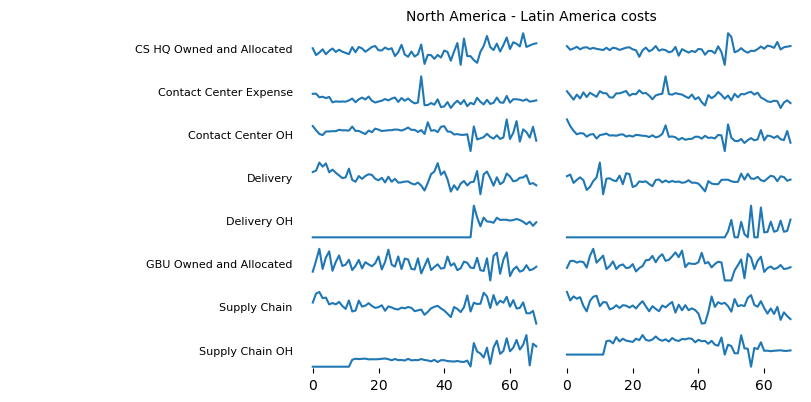

In [201]:
fig = plt.figure(figsize=(8,22), constrained_layout=True)
#fig.suptitle('Latin America')
x = range(0,69)
counter = 0

for line_cost in na_trn_plt.columns:
    counter += 1
    ax2 = fig.add_subplot(60, 3, counter)
    ax2.text(1.15, 0.5, s=line_cost, ha='right', va='center', size=8)
    ax2.axis('off')
    
    counter += 1 #next plot
    ax3 = fig.add_subplot(60, 3, counter)
    ax3.plot(x, na_trn_plt[line_cost])
    #ax3.axhline(c='grey')

    counter += 1 #next plot
    ax1 = fig.add_subplot(60, 3, counter)
    ax1.plot(x, la_trn_plt[line_cost])

    plt.setp(ax1.get_xticklabels(), visible=False)
    plt.setp(ax1.get_yticklabels(), visible=False)
    plt.setp(ax1.get_xticklines(), visible=False)
    plt.setp(ax1.get_yticklines(), visible=False)
    plt.setp(ax1.spines.values(), visible=False)

    plt.setp(ax3.get_xticklabels(), visible=False)
    plt.setp(ax3.get_yticklabels(), visible=False)
    plt.setp(ax3.get_xticklines(), visible=False)
    plt.setp(ax3.get_yticklines(), visible=False)
    plt.setp(ax3.spines.values(), visible=False)

plt.setp(ax1.get_xticklabels(), visible=True)
plt.setp(ax1.get_xticklines(), visible=True)
ax1.xaxis.tick_bottom()

plt.setp(ax3.get_xticklabels(), visible=True)
plt.setp(ax3.get_xticklines(), visible=True)
ax3.xaxis.tick_bottom()

fig.suptitle('North America - Latin America costs', ha='left', size=10)

plt.show()

Se puede apreciar los valores nulos y los atípicos.
- Delivery OH empieza hasta después del mes 48.
- Supply Chhain OH empieza hasta después del mes 48.
- Casi todos los valores atípicos son precedidos de un valor nulo (0), significa que en el valor nulo no existe registro de gastos y por lo tanto el siguiente mes es mucho más alto. Esencialmente lo correspondiente del mes pasado más el mes actual. Un mes no hay gasto registrado y al siguiente es lo correspondiente a dos meses. Son dos valores atípicos a tratar por error humano. Como en la serie de CS HQ Owned en Latin America en el mes 50.
- La gráfica muestra que las series de tiempo carecen de gran tendencia, y son ciclicas. Procesos estacionarios y estacionales.

Para la serie de tiempo se usaran variables dummies para considerar los valores atípicos o reemplazarlos por el el valor inmediato anterior.

In [202]:
la_trn_plt = data_train.unstack().loc[pd.IndexSlice[:, 'Latin America Market'], :].droplevel('market')
na_trn_plt = data_train.unstack().loc[pd.IndexSlice[:, 'North America Market'], :].droplevel('market')

In [203]:
pd.DataFrame(na_trn_plt.apply(lambda x: np.std(x)/np.mean(x), axis=0), columns=['NA coeficiente variación']).join(
    pd.DataFrame(la_trn_plt.apply(lambda x: np.std(x)/np.mean(x), axis=0), columns=['LA coeficiente varianción']))


,NA coeficiente variación,LA coeficiente varianción
line_cost,,
CS HQ Owned and Allocated,0.181132,0.218788
Contact Center Expense,0.180603,0.139662
Contact Center OH,0.221789,0.265441
Delivery,0.120434,0.225198
Delivery OH,0.240928,0.700224
GBU Owned and Allocated,0.285684,0.319551
Supply Chain,0.132234,0.133093
Supply Chain OH,0.684712,0.532170


El coeficiente de variación indica que los costos Delivery OH y Supply Chain OH son los más dispersos. Pueden ser los más complicados de pronosticar.

In [204]:
na_trn_plt.describe()

line_cost,CS HQ Owned and Allocated,Contact Center Expense,Contact Center OH,Delivery,Delivery OH,GBU Owned and Allocated,Supply Chain,Supply Chain OH
count,6.900000e+01,6.900000e+01,68.000000,6.900000e+01,20.000000,6.900000e+01,6.900000e+01,5.700000e+01
mean,1.897886e+06,5.342644e+06,531078.058376,2.464819e+06,426592.700005,1.419436e+06,1.137621e+07,6.818627e+05
std,3.462872e+05,9.719670e+05,118662.930224,2.990222e+05,105447.978331,4.084803e+05,1.515339e+06,4.710294e+05
min,1.081765e+06,3.614842e+06,259757.510000,1.737022e+06,275653.330000,4.077544e+05,6.826872e+06,1.196399e+04
25%,1.675260e+06,4.870979e+06,466403.175175,2.275964e+06,386455.442500,1.120646e+06,1.047727e+07,4.073553e+05
50%,1.889849e+06,5.288916e+06,549634.680000,2.447753e+06,425757.745000,1.321768e+06,1.112311e+07,4.832270e+05
75%,2.084538e+06,5.711187e+06,583998.585000,2.657105e+06,445694.222500,1.725523e+06,1.221983e+07,9.764171e+05
max,2.854893e+06,1.100208e+07,868604.040000,3.197913e+06,790868.280000,2.403274e+06,1.502892e+07,2.039291e+06


In [205]:
la_trn_plt.describe()

line_cost,CS HQ Owned and Allocated,Contact Center Expense,Contact Center OH,Delivery,Delivery OH,GBU Owned and Allocated,Supply Chain,Supply Chain OH
count,68.000000,6.900000e+01,68.000000,69.000000,15.000000,66.000000,6.900000e+01,56.000000
mean,464007.300880,8.357180e+05,111613.533465,415451.227893,251745.638000,261571.059200,3.752126e+06,204914.860731
std,102274.236981,1.175729e+05,29847.080644,94244.084012,182465.413377,84225.911632,5.030413e+05,110036.419515
min,235270.406994,5.066162e+05,59912.950000,134312.865192,64044.690000,33427.390000,2.381713e+06,-225430.200000
25%,408129.760845,7.708853e+05,93190.881099,373458.620431,111530.320000,192565.397500,3.463264e+06,114245.310000
50%,454001.027526,8.609047e+05,108287.055000,409929.900948,134796.560000,261363.645000,3.772302e+06,248339.955150
75%,503366.920601,9.025187e+05,120293.043207,459638.860000,342226.585000,307458.597500,4.071391e+06,280773.326143
max,925584.770000,1.364132e+06,233716.999351,789647.231133,634989.850000,471541.060000,4.907068e+06,363723.819901


Lo remarcable en la decripción de los datos es:
- La falta de un dato en la serie de costos Contact Center OH.
- La falta de 13 meses en la serie de costos Supply Chain OH. Por las gráficas son datos de finales del 2016.
- GBU Owned and CS HQ Owned para Latin America le faltan 3 meses.
- Las serie de Delivery OH empieza apenas hace 20 meses para Norte America y 15 meses para Latin America.
- Los ordenes de magnitud son muy diferentes entre Latin America y Norte America y entre cada tipo de costo. La covarianza no nos diría mucho y la mayoría de las veces sera positiva.
- El coeficiente de variación indica que los costos Delivery OH y Supply Chain OH son los más variables.

- Las series de Delivery OH y Supply Chain OH se trataran como que comenzaron en noviembre de 2020.

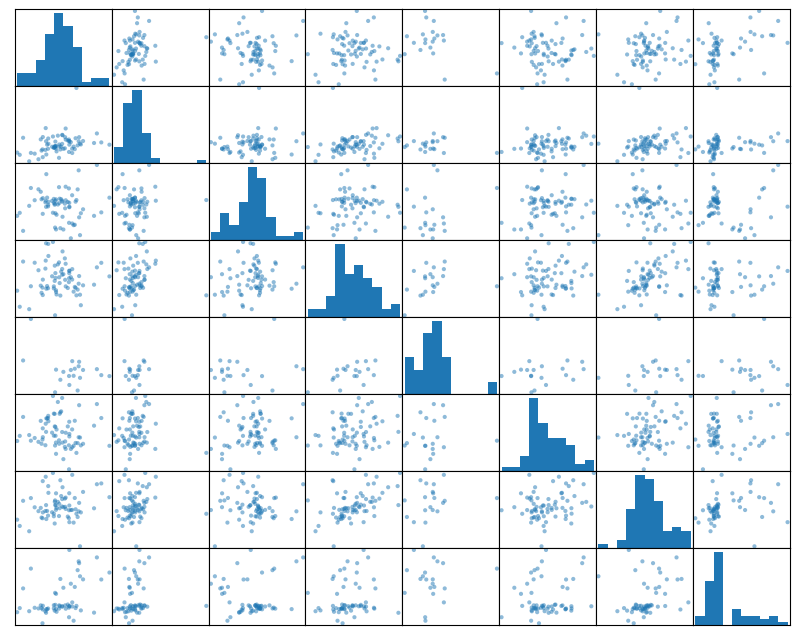

In [206]:
scatter_corr = pd.plotting.scatter_matrix(na_trn_plt, figsize=(10,8))
for subaxis in scatter_corr:
    for ax in subaxis:
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        ax.set_ylabel("")
        ax.set_xlabel("")

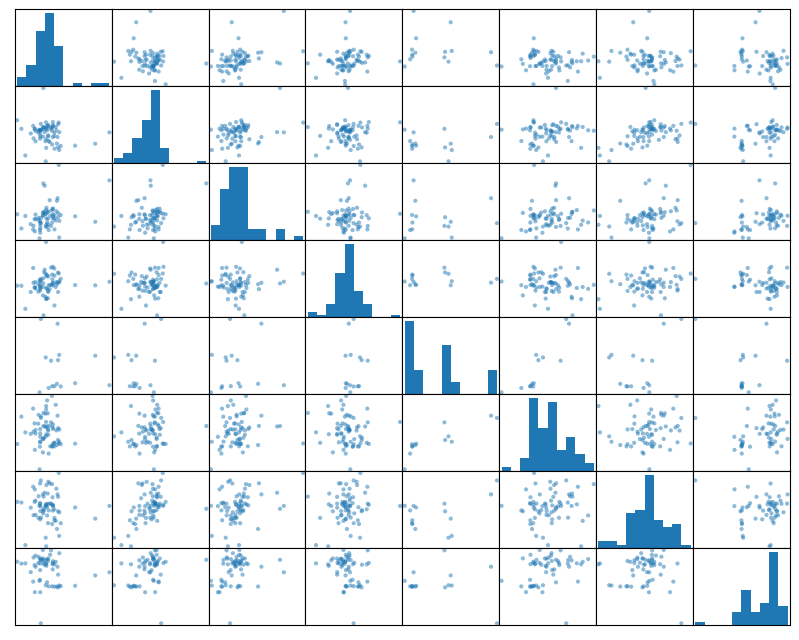

In [207]:
scatter_corr = pd.plotting.scatter_matrix(la_trn_plt, figsize=(10,8))
for subaxis in scatter_corr:
    for ax in subaxis:
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        ax.set_ylabel("")
        ax.set_xlabel("")

Las distribuciones muestran los atícos y en su mayoría son sesgados positivamente. Solo dos sesgos negativos en Latin America, 6 sesgos mayores a 1 entre ambas regiones. Las correlaciones entre los tipos de gastos es baja. En general, para la región de Norte America los costos parecen más correlacionados que para Latin America, donde casi todos son entre -0.2 y 0.2.

En algunos casos como Supply Chain OH y CS HQ Norte America tiene una correlación de 0.5. O Supply Chain y Delivery, que esperas que tenga sentido por que ambos son costos variables derivados del volumen de repaciones hechas. Para Latin America, GBU Owned y Delivery OH tienen una correlacion de alrededor de 0.8. Al final, estas correlaciones y las variables como predictoras de otras variables son inusables para predecir al futuro por que no existen en el futuro entonces no es posible usarse unas a otras. Para este problema usaremos otras series de tiempo pronosticadas, que incluyen metricas operativas, envio de productos terminados e ingresos monetarios.

In [208]:
pd.DataFrame(na_trn_plt.skew(), columns=['NA sesgo']).join(
    pd.DataFrame(la_trn_plt.skew(), columns=['LA sesgo']))

,NA sesgo,LA sesgo
line_cost,,
CS HQ Owned and Allocated,0.139127,1.764433
Contact Center Expense,2.874702,0.672939
Contact Center OH,0.120663,1.685349
Delivery,0.259752,0.360326
Delivery OH,2.080864,1.039922
GBU Owned and Allocated,0.364877,0.232233
Supply Chain,0.233576,-0.345080
Supply Chain OH,1.282627,-1.315734



## Procesamiento de datos

### Atípicos
Ya que los datos que tenemos son series de tiempo no correlacionadas ni dependientes (hasta ahora todos son independientes), los datos son vectores unidemensionales. Y por eso, atípicos sea **3 veces el rango interquartilico** más menos la media. Consideramos que los valor atípicos son usualmente errores humanos y no algo que tiene que ser estudiado a deteminiemto, o que la data que posiblemente explique el fenomeno no esta en este conjunto de datos. Valores nulos después de haber comenzado la serie son también valores atípicos.

In [209]:
def fnd_n_rplc_outlrs(df, list_line_cost):
    #find
    for variable_name in list_line_cost:
        var = df[variable_name]
        q1 = var.quantile(0.25)
        q3 = var.quantile(0.75)
        iqr = q3 - q1
        print(variable_name + ' tiene ' + str(((var < q1-3*iqr)|(var > q3+3*iqr)).sum()) + ' valores extremos.')
    #replace
        for x, dates in zip(var[(var < q1-3*iqr)|(var > q3+3*iqr)|(pd.isnull(var))|(var < 0)], var[(var < q1-3*iqr)|(var > q3+3*iqr)|(pd.isnull(var))|(var < 0)].index):
            #because we belive it is a cicle of each Q then we use the correspondent month from the previous quarter
            #or future, in case the there isn't previous values
            #print(x, dates, var[np.datetime64(dates, 'M') - 3])
            if (np.datetime64(dates, 'M') - 3) >= np.datetime64('2016-11', 'M'):
                var[dates] = var[np.datetime64(dates, 'M') - 3]
            else:
                var[dates] = var[np.datetime64(dates, 'M') + 3]

In [210]:
fnd_n_rplc_outlrs(na_trn_plt, ['CS HQ Owned and Allocated', 'Contact Center Expense', 'Contact Center OH', 'Delivery', 'GBU Owned and Allocated', 'Supply Chain'])

CS HQ Owned and Allocated tiene 0 valores extremos.
Contact Center Expense tiene 1 valores extremos.
Contact Center OH tiene 0 valores extremos.
Delivery tiene 0 valores extremos.
GBU Owned and Allocated tiene 0 valores extremos.
Supply Chain tiene 0 valores extremos.


In [211]:
fnd_n_rplc_outlrs(la_trn_plt, ['CS HQ Owned and Allocated', 'Contact Center Expense', 'Contact Center OH', 'Delivery', 'GBU Owned and Allocated', 'Supply Chain'])

CS HQ Owned and Allocated tiene 2 valores extremos.
Contact Center Expense tiene 1 valores extremos.
Contact Center OH tiene 1 valores extremos.
Delivery tiene 1 valores extremos.
GBU Owned and Allocated tiene 0 valores extremos.
Supply Chain tiene 0 valores extremos.


In [212]:
def fnd_n_rplc_outlrs_oh(df, list_line_cost):
    #find
    for variable_name in list_line_cost:
        var = df[variable_name].loc['2020-11':]
        q1 = var.quantile(0.25)
        q3 = var.quantile(0.75)
        iqr = q3 - q1
        print(variable_name + ' tiene ' + str(((var < q1-3*iqr)|(var > q3+3*iqr)).sum()) + ' valores extremos.')
    #replace
        for x, dates in zip(var[(var < q1-3*iqr)|(var > q3+3*iqr)|(pd.isnull(var))|(var < 0)], var[(var < q1-3*iqr)|(var > q3+3*iqr)|(pd.isnull(var))|(var < 0)].index):
            #because we belive it is a cicle of each Q then we use the correspondent month from the previous quarter
            #print(x, dates, var[np.datetime64(dates, 'M') - 3])
            if (np.datetime64(dates, 'M') - 3) >= np.datetime64('2020-11', 'M'):
                var[dates] = var[np.datetime64(dates, 'M') - 3]
            else:
                var[dates] = var[np.datetime64(dates, 'M') + 3]
    #make sure all before is nan
        df[variable_name].loc[:'2020-10'] = np.nan

In [213]:
fnd_n_rplc_outlrs_oh(na_trn_plt, ['Delivery OH', 'Supply Chain OH'])
fnd_n_rplc_outlrs_oh(la_trn_plt, ['Delivery OH', 'Supply Chain OH'])

Delivery OH tiene 1 valores extremos.
Supply Chain OH tiene 0 valores extremos.
Delivery OH tiene 0 valores extremos.
Supply Chain OH tiene 2 valores extremos.


### Tratamiento de sesgo y estabilización de varianza.

Usando la generalización box-cox ya que los valores son estrictamente positivos. La clase PowerTransformer de sklearn encuentra el mejor lambda y normaliza media cero y desviación estandar unitaria.

In [214]:
from sklearn.preprocessing import PowerTransformer
na_trn_transformer = PowerTransformer(method='box-cox', standardize=True, copy=True)
na_trnsfrm_std = na_trn_transformer.fit_transform(na_trn_plt)
print(na_trn_transformer.lambdas_)
na_trnsfrm_std = pd.DataFrame(na_trnsfrm_std, columns=na_trn_plt.columns, index=na_trn_plt.index)
na_trnsfrm_std.skew()

[0.82336719 0.86976929 0.8549776  0.35878591 2.30165557 0.60703014
 0.64555082 0.97333887]


line_cost
CS HQ Owned and Allocated    0.019165
Contact Center Expense       0.000781
Contact Center OH            0.022436
Delivery                     0.003213
Delivery OH                 -0.142155
GBU Owned and Allocated      0.015538
Supply Chain                 0.029473
Supply Chain OH             -0.577694
dtype: float64

In [215]:
la_trn_transformer = PowerTransformer(method='box-cox', standardize=True, copy=True)
la_trnsfrm_std = la_trn_transformer.fit_transform(la_trn_plt)
print(la_trn_transformer.lambdas_)
la_trnsfrm_std = pd.DataFrame(la_trnsfrm_std, columns=la_trn_plt.columns, index=la_trn_plt.index)
la_trnsfrm_std.skew()

[ 1.42885098  3.96265743 -0.18349226  1.73744394 -0.44252247  0.86033292
  1.73344112  0.41355696]


line_cost
CS HQ Owned and Allocated    0.045933
Contact Center Expense      -0.147578
Contact Center OH           -0.013009
Delivery                     0.011757
Delivery OH                  0.125001
GBU Owned and Allocated      0.056920
Supply Chain                 0.018750
Supply Chain OH             -0.048672
dtype: float64

Hasta aquí los datos que seran usados para entrenar estan sin atípicos, transformados y normalizados en los *dataframes la_trnsfrm_std y na_trnsfrm_std*.
Lo siguiente, para modelos de series de tiempo, es estudiar la estacionalidad y estacionaridad con la descomposición de series de tiempo.

Creo que el mejor tipo de modelo sería aditivo por que los valores no cambian mucho con el tiempo, un modelo aditivo es lineal donde los cambios a lo largo del tiempo se realizan consistentemente en la misma cantidad. Una tendencia lineal es una línea recta. Una estacionalidad lineal tiene la misma frecuencia (ancho de ciclos) y amplitud (alto de ciclos).

A diferencia el tipo multiplicativo es no lineal, como cuadrático o exponencial. Los cambios aumentan o disminuyen con el tiempo. Una tendencia no lineal es una línea curva. Una estacionalidad no lineal tiene una frecuencia y/o amplitud creciente o decreciente a lo largo del tiempo.

In [233]:
from statsmodels.tsa.seasonal import STL

In [229]:
na_trn_plt.index = pd.date_range('2016-11-01', '2022-08-01', freq='m')
na_trnsfrm_std.index = pd.date_range('2016-11-01', '2022-08-01', freq='m')

la_trn_plt.index = pd.date_range('2016-11-01', '2022-08-01', freq='m')
la_trnsfrm_std.index = pd.date_range('2016-11-01', '2022-08-01', freq='m')

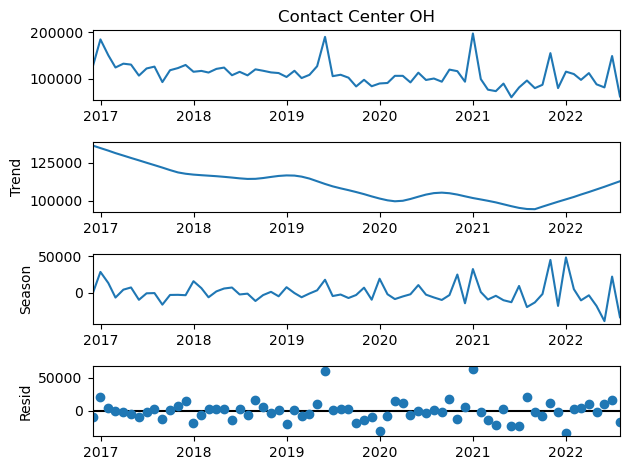

In [286]:
result = STL(la_trn_plt['Contact Center OH']).fit()
result.plot()
plt.show()

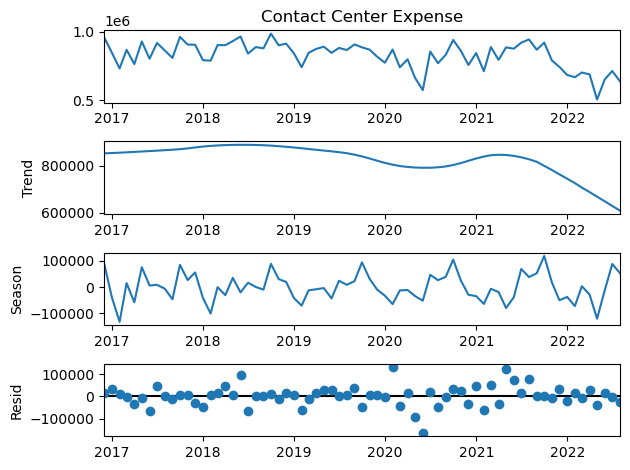

In [290]:
result = STL(la_trn_plt['Contact Center Expense']).fit()
result.plot()
plt.show()

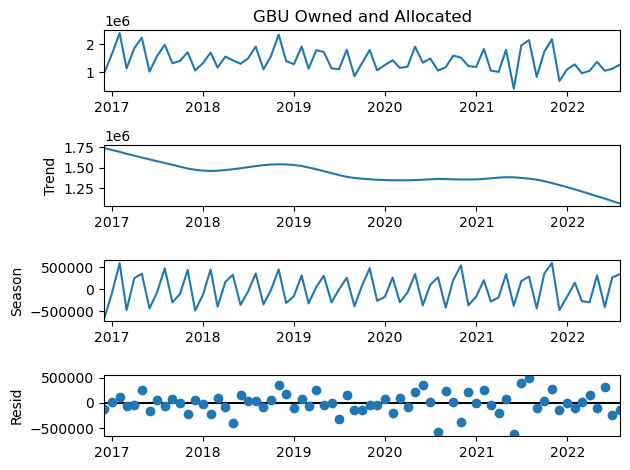

In [291]:
result = STL(na_trn_plt['GBU Owned and Allocated']).fit()
result.plot()
plt.show()

In [288]:
for var in ['CS HQ Owned and Allocated', 'Contact Center Expense', 'Contact Center OH', 'Delivery', 'GBU Owned and Allocated', 'Supply Chain']:
    result = STL(na_trn_plt[var]).fit()
    print(var + ' en promedio no es explicado por la tendencia o estacionalidad ' + str(np.mean(result.resid/result.observed)))

CS HQ Owned and Allocated en promedio no es explicado por la tendencia o estacionalidad -0.01640981711449364
Contact Center Expense en promedio no es explicado por la tendencia o estacionalidad -0.0071179734436191
Contact Center OH en promedio no es explicado por la tendencia o estacionalidad -0.01962682368818318
Delivery en promedio no es explicado por la tendencia o estacionalidad -0.007404569467286935
GBU Owned and Allocated en promedio no es explicado por la tendencia o estacionalidad -0.028834878112089072
Supply Chain en promedio no es explicado por la tendencia o estacionalidad -0.0035849187393524745


In [289]:
for var in ['CS HQ Owned and Allocated', 'Contact Center Expense', 'Contact Center OH', 'Delivery', 'GBU Owned and Allocated', 'Supply Chain']:
    result = STL(la_trn_plt[var]).fit()
    print(var + ' en promedio no es explicado por la tendencia o estacionalidad ' + str(np.mean(result.resid/result.observed)))

CS HQ Owned and Allocated en promedio no es explicado por la tendencia o estacionalidad -0.017015241445125933
Contact Center Expense en promedio no es explicado por la tendencia o estacionalidad -0.0006599053172782173
Contact Center OH en promedio no es explicado por la tendencia o estacionalidad -0.024516782775085618
Delivery en promedio no es explicado por la tendencia o estacionalidad -0.02786271588454306
GBU Owned and Allocated en promedio no es explicado por la tendencia o estacionalidad -0.0775585722177852
Supply Chain en promedio no es explicado por la tendencia o estacionalidad -0.0056825934463184445


Debido que a que son muchas gráficas y series de tiempo, quiero calcular la influencia media de los residuos sobre los valores observados con el proposito de comparar entre las series y observar cuales tienen mayor valores "inexplicables" en promedio. 

Como podemos observar en los resultados anteriores, *Contact Center OH* tiene un residuo muy alto promedio. *Contact Center Expense* en Latino America parace ser explicado de buena manera por la tendencia y estacionalidad.

GBU Owned and Allocated en ambas regiones tiene una periodicidad muy clara pero también tiene residuos, en promedio, muy altos.